In [1]:
import numpy as np 
import pandas as pd


In [1]:
path = 'C:\\Users\\IT Shop\\Downloads\\example.txt'

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [3]:
import json 

with open(path) as f:
    records = [json.loads(line) for line in f]


In [11]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]


'America/Los_Angeles'

In [12]:
def get_count(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [15]:
counts = get_count(time_zones)
len(time_zones)

3440

In [17]:
def get_top_count(count_dict , n = 10):
    key_value_pairs = [(count , tz ) for tz , count in count_dict.items()]
    key_value_pairs.sort()
    return key_value_pairs[-n:]


In [19]:
get_top_count(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [20]:
# another way for counting time zones :
from collections import defaultdict 
def get_count2(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts

In [27]:
# anothe way 
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [6]:
frame = pd.DataFrame(records)
frame.info()
frame['tz'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [97]:
tz_counts = frame['tz'].value_counts()
tz_counts 

America/New_York        1251
k                        521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
                        ... 
Europe/Uzhgorod            1
Australia/Queensland       1
Europe/Sofia               1
America/Costa_Rica         1
America/Tegucigalpa        1
Name: tz, Length: 97, dtype: int64

In [20]:
#coleaning time_zones 
clean_tz = frame['tz'].fillna("missing")

clean_tz[clean_tz == "k"] = "unknown"

tz_counts = clean_tz.value_counts()

tz_counts.head()

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: tz, dtype: int64

<AxesSubplot:>

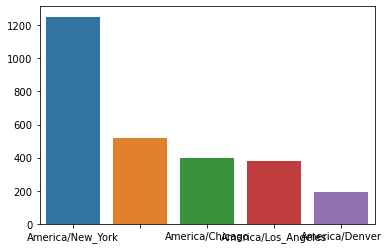

In [21]:
import seaborn as sns 
subset = tz_counts.head()
sns.barplot(x=subset.index , y=subset.to_numpy())

In [113]:
frame['a']
frame['a'][1]
frame['a'][5] # long line


'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [123]:
frame[frame['a']=='k'] = 'unknown'
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])
result.head()

result.value_counts().head(20)

Mozilla/5.0                    2161
Mozilla/4.0                     556
unknown                         521
GoogleMaps/RochesterNY          121
TEST_INTERNET_AGENT              24
GoogleProducer                   17
Opera/9.80                       15
Mozilla/6.0                       5
Dalvik/1.4.0                      3
Socialite/7766                    2
Goldfire                          2
Opera/9.64(Windows                1
Opera/9.00                        1
Vancouver                         1
Vodafone/1.0/LG-KU990i/V10c       1
sometrik.com                      1
Opera/9.30                        1
HTTP_Request2/2.0.0               1
ICE                               1
BlackBerry9700/5.0.0.423          1
dtype: int64

In [7]:
cframe = frame[frame['a'].notna()].copy()

cframe['os'] = np.where(cframe['a'].str.contains("Windows") , "Windows" , "Not Windows")
cframe['os'].head()


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [9]:
by_os_tz = cframe.groupby(['tz','os'])



In [10]:
agg_counts = by_os_tz.size().unstack().fillna(0)
agg_counts.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [167]:
agg_counts.sum(axis='columns').nlargest(10)

tz
America/New_York       1251.0
unknown                 521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [12]:
indexer = agg_counts.sum(axis = "columns").argsort()
indexer.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

In [17]:
count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [182]:
max_value = agg_counts.take(indexer).max()
max_value

os
Not Windows    521.0
Windows        912.0
dtype: float64

In [18]:
count_subset = count_subset.stack()

count_subset.name = "total"

count_subset = count_subset.reset_index()

count_subset.head(10)


,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


<AxesSubplot:xlabel='total', ylabel='tz'>

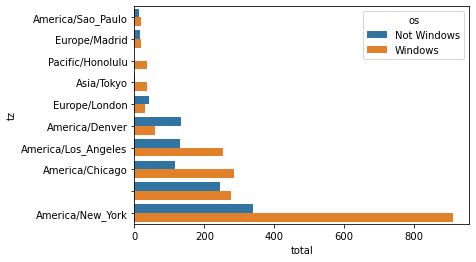

In [24]:
sns.barplot(x = 'total' , y = 'tz' , hue = 'os' , data = count_subset)

In [26]:
#compute the precentage of tz to os 
def norm_total(group):
    group['normed_total'] = group['total']/group['total'].sum()
    return group
result = count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

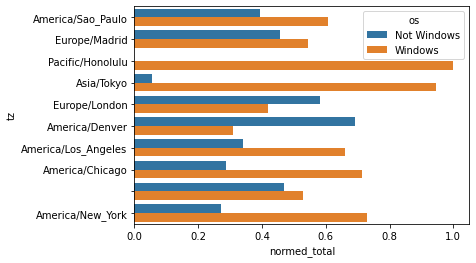

In [30]:
sns.barplot(x = 'normed_total' , y = 'tz' , hue = 'os' , data = result)

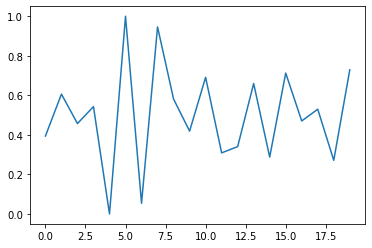

In [35]:
import matplotlib.pyplot as plt 
g = count_subset.groupby('tz')
results = count_subset['total']/g['total'].transform('sum')

plt.plot(results)